In [14]:
# Import required libraries

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras as plt
from tensorflow.keras import models, layers 
from IPython.display import HTML

In [15]:
# Store data into tensorflow dataset

BATCH_SIZE = 16
IMAGE_SIZE = (256, 256)

In [16]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(r"C:\Users\joshu\OneDrive\Documents\Career\Projects\tomato-ai-project\training\PlantVillage",
    batch_size=BATCH_SIZE,
    image_size=IMAGE_SIZE,
    shuffle=True,
    seed=24,
)

Found 16011 files belonging to 10 classes.


In [17]:
class_names = dataset.class_names
class_names

['Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

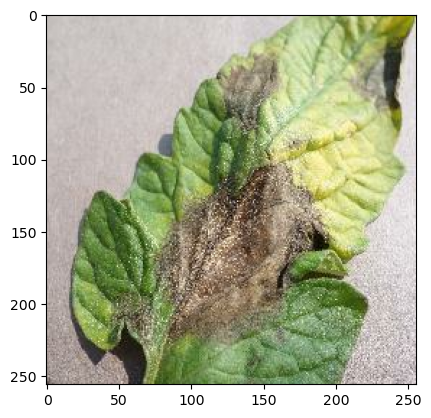

In [18]:
# Visualise images from tf dataset

import matplotlib.pyplot

for image_batch, label_batch in dataset.take(1):
 matplotlib.pyplot.imshow(image_batch[0].numpy().astype("uint8"))
 matplotlib.pyplot.show()

In [19]:
EPOCHS = 50

In [20]:
#Train test split

80% training set
10% validation set
10% test set

SyntaxError: invalid syntax (1709533839.py, line 3)

In [21]:
def get_partitioned_datasets(dataset, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    if shuffle:
        dataset = dataset.shuffle(shuffle_size, seed=10)

    dataset_len = len(dataset)

    train_len = int(train_split * dataset_len)
    train_dataset = dataset.take(train_len)
    dataset = dataset.skip(train_len)

    val_len = int(val_split * dataset_len)
    val_dataset = dataset.take(val_len) 
    dataset = dataset.skip(val_len)

    test_len = dataset_len - train_len - val_len
    test_dataset = dataset.take(test_len) 

    return train_dataset, val_dataset, test_dataset

In [22]:
train_dataset, val_dataset, test_dataset = get_partitioned_datasets(dataset)

In [23]:
train_dataset = train_dataset.shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_dataset = val_dataset.shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_dataset = test_dataset.shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [24]:
#Data Augmentation

ONE_IMAGE_SIZE = 256

resise_and_rescale = tf.keras.Sequential([
    layers.Resizing(ONE_IMAGE_SIZE, ONE_IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])

In [25]:
data_augmentation = tf.keras.Sequential({
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomTranslation(height_factor=0.2, width_factor=0.2),
    layers.RandomContrast(0.2),
    layers.RandomBrightness(0.2)
})

In [29]:
from tensorflow.keras import layers, models

# Define the resize_and_rescale layer
resize_and_rescale = models.Sequential([
    layers.Resizing(ONE_IMAGE_SIZE, ONE_IMAGE_SIZE),
    layers.Rescaling(1./255)
])

# Define model
input_shape = (BATCH_SIZE, ONE_IMAGE_SIZE, ONE_IMAGE_SIZE, CHANNELS)
n_classes = 10

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

c:\Users\joshu\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_2 (Sequential)       │ (16, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (16, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (16, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (16, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (16, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (16, 246016)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (16, 64)               │    15,745,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (16, 10)               │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,765,130 (60.14 MB)

 Trainable params: 15,765,130 (60.14 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [32]:
model.fit(
    train_dataset,
    batch_size=BATCH_SIZE,
    validation_data=val_dataset,
    verbose=1,
    epochs=8,
)

Epoch 1/8


: 

In [ ]:
model.evaluate(test_dataset)

In [ ]:
# visualize image with predicted label
for images_batch, label_batch in test_dataset.take(1):

    first_image = images_batch[0].numpy().astype('uint8')
    first_label = label_batch[0]

    print("The first image")
    plt.imshow(first_image)
    print("The first image's actual label:", class_names[first_label])

    batch_prediction = model.predict(image_batch)
    print("The Predicted label:", class_names[np.argmax(batch_prediction[0])])